In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"

In [3]:
# !wget $data

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

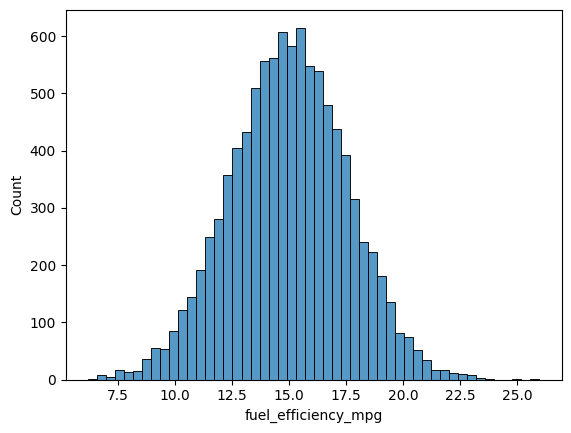

In [6]:
# Look at the fuel_efficiency_mpg variable. Does it have a long tail? Answer: No long tail
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [7]:
# Question 1
# There's one column with missing values. What is it?
df.isnull().sum()

# horsepower             

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
# Question 2
# What's the median (50% percentile) for variable 'horsepower'?
df.horsepower.median()

np.float64(149.0)

In [9]:
# Prepare and split the dataset
# Shuffle the dataset (the filtered one you created above), use seed 42
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train, n_val, n_test

(9704, 5824, 1940, 1940)

In [10]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [11]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [12]:
# Question 3
# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?

In [13]:
# fill it with 0 
df_train = df_train.fillna(0)            

In [14]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
# y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
# y_test = np.log1p(df_test.fuel_efficiency_mpg.values)
y_train

array([2.8703359 , 2.85061269, 2.97511223, ..., 2.92279789, 2.99201277,
       2.94261017], shape=(5824,))

In [15]:
X_train = np.array(df_train[['engine_displacement', 'horsepower','vehicle_weight','model_year']])
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [16]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res
    
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [17]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(3.6646662472218297),
 array([ 2.14827083e-06,  2.21209296e-04, -3.23460699e-04,  1.64673232e-05]))

In [18]:
y_pred = w0 + X_train.dot(w)
y_pred = np.expm1(y_pred)

In [19]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [20]:
rmse(y_train, y_pred)

np.float64(12.431913010523537)

<Axes: ylabel='Count'>

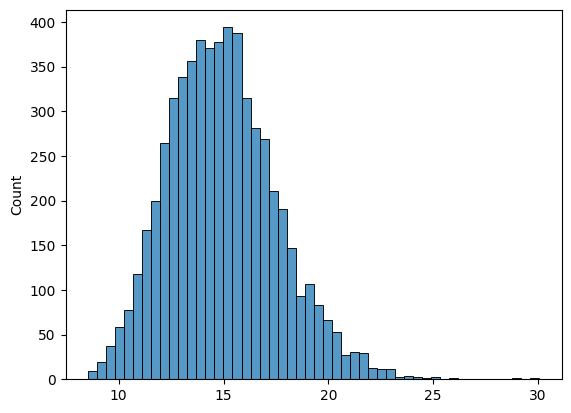

In [21]:
sns.histplot(y_pred, bins=50)

In [22]:
# fill it with mean
df_train = df.iloc[idx[:n_train]]
df_train = df_train.fillna(149.544764)

In [23]:
X_train = np.array(df_train[['engine_displacement', 'horsepower','vehicle_weight','model_year']])
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [24]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(3.6710008195355046),
 array([ 3.63140955e-06,  6.65758686e-04, -3.23242585e-04, -2.14173525e-05]))

In [25]:
y_pred = w0 + X_train.dot(w)
y_pred = np.expm1(y_pred)

In [26]:
rmse(y_train, y_pred)

np.float64(12.436121533021216)

In [27]:
# sns.histplot(y_pred, bins=50)

In [28]:
# Question 4
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?  Answer: r = 0

In [29]:
# fill it with mean
df_train = df.iloc[idx[:n_train]]
df_train = df_train.fillna(0)

In [30]:
X_train = np.array(df_train[['engine_displacement', 'horsepower','vehicle_weight','model_year']])
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [31]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [32]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_train.dot(w)
    score = round(rmse(y_train, y_pred),2)
    
    print(r, w0, score)

0 3.6646662472218297 0.04
0.01 3.1688134470074534 0.04
0.1 1.4288369989383432 0.04
1 0.22012861946726972 0.04
5 0.04624885656570121 0.04
10 0.023271722731248758 0.04
100 0.0023413689852701753 0.04


In [33]:
# Question 5
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [63]:
idx = np.arange(n)
score_list = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)

    # split data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # fill missing values
    df_train = df_train.fillna(0)  

    # evaluate model
    X_train = np.array(df_train[['engine_displacement', 'horsepower','vehicle_weight','model_year']])
    y_train = np.log1p(df_train.fuel_efficiency_mpg.values)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    y_pred = np.expm1(y_pred)
    y_train = np.expm1(y_train)
    score = rmse(y_train, y_pred)
    score_list = score_list + [score]
    
    # print(seed, score)
    

In [90]:
round(np.std(score_list),3)
# sns.histplot(y_train, bins=50)
# sns.histplot(y_pred, bins=50)


np.float64(0.005)

In [91]:
# Question 6
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?


In [98]:
np.random.seed(9)
np.random.shuffle(idx)

# split data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [99]:
combined_df = pd.concat([df_train, df_val], ignore_index=True)

In [100]:
combined_df = combined_df.fillna(0)

In [101]:
X_train = np.array(combined_df[['engine_displacement', 'horsepower','vehicle_weight','model_year']])
y_train = np.log1p(combined_df.fuel_efficiency_mpg.values)

In [102]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_train.dot(w)
y_pred = np.expm1(y_pred)
y_train = np.expm1(y_train)
score = round(rmse(y_train, y_pred),3)
score

np.float64(0.603)

<Axes: ylabel='Count'>

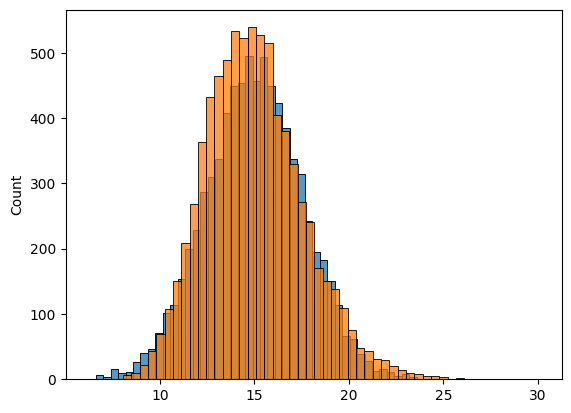

In [103]:
# sns.histplot(y_train, bins=50)
# sns.histplot(y_pred, bins=50)